In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
from shapely.affinity import translate
import pyproj
from shapely.ops import transform

In [2]:
#create a dataframe for each of the buses and the squares, assign each dataframe with the house number, geomtric data and colour options
house_perimeter_df = gpd.GeoDataFrame(crs = 'epsg:3395', columns = ['House number', 'geometry', 'color']) 
house_bus_df = gpd.GeoDataFrame(crs = 'epsg:3395', columns = ['House number', 'geometry', 'color']) 
school_bus_df = gpd.GeoDataFrame(crs = 'epsg:3395', columns = ['geometry', 'color'])
school_perimeter_df = gpd.GeoDataFrame(crs = 'epsg:3395', columns = ['geometry', 'color'])
pv_bus_df = gpd.GeoDataFrame(crs = 'epsg:3395', columns = ['geometry', 'color'])
pv_perimeter_df = gpd.GeoDataFrame(crs = 'epsg:3395', columns = ['geometry', 'color'])

In [3]:
#define the plot layout and road dimensions in terms of x & y components. Units m
sqx = 20
sqy = 20
rdx = 10
rdy = 10
#there will be 6 rows (blocks) of 25 houses (1 district)
houses_per_district = 15
streets = 5
#assign colour values for the phases
colors = ['Red', 'Yellow', 'Blue']

In [4]:
#assign x to the co-ordinates of the proposed site location
x1 = Point(18.314435,-78.199295) 

# Create transform for coordinate system to be used in meters
project = pyproj.Transformer.from_proj(
    pyproj.Proj('epsg:4326'), # source coordinate system [global in degrees]
    pyproj.Proj('epsg:3395')) # destination coordinate system [global in m]

xnew  = transform(project.transform, x1)  # apply projection

print(f'New co-ord = {xnew.x},{xnew.y}') # display values in new projection

# Create reverse transform so that the each dataframe can be saved back in the global system
project2 = pyproj.Transformer.from_proj(
    pyproj.Proj('epsg:3395'), # source coordinate system
    pyproj.Proj('epsg:3857')) # destination coordinate system


New co-ord = -8705105.699792985,2060965.7281612882


<AxesSubplot:>

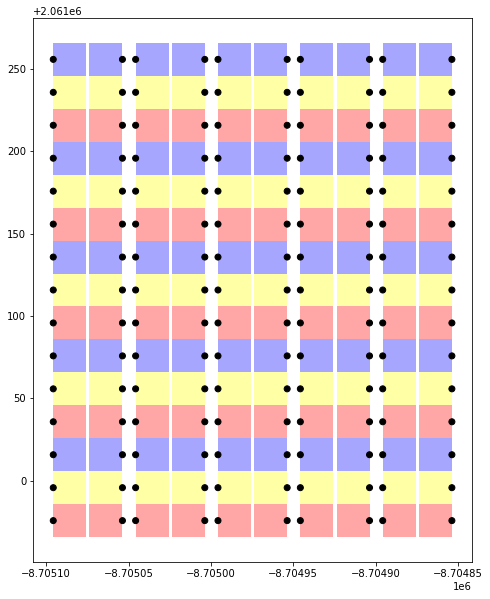

In [5]:
#nested for function created so that each house within the district separated and drawn with a point, as a function of the x & y components defined above.
#using the modulus to return the remainder of the house number divided by the total number of houses as a bit shifter

for street in range(streets):
    for strip in range(2):
        if(strip ==1):
            for house_number in range(houses_per_district):
                x = xnew.x + 1*rdx + street*(2*sqx+1*rdx)
                y = xnew.y + ((house_number%15 * sqy) + 0.5 * sqy)
                #using the specific co-ordinates of each node, define a 4 points around the node to define the perimeter of the plot. this forms anticlockwise from the origin.
                vertices = [Point((x+sqx),(y-0.5*sqy)), Point((x+sqx),(y+0.5*sqy)), Point((x),(y+0.5*sqy)), Point((x),(y-0.5*sqy))]
            
                #each colour, as defined above, is attributed to the house number as a modulus of 3 to the house number. thus colouring each square, red/yellow/blue repeat.            
                color = colors[house_number%3]
                #the perimeter of the box is created using the vertices, the polygon command takes these points and converts it to a shape
                perimeter = Polygon(vertices)
            
                bus_location = Point(x,y)
                
                #before appending the data, apply the reverse transform
                perimeter_2 = transform(project2.transform, perimeter)
                bus_location_2 = transform(project2.transform, bus_location)
            
                #append these data sets to the dataframe
                house_perimeter = {'House number' : house_number, 'geometry': perimeter, 'color' : color}
                house_bus = {'House number' : house_number, 'geometry': bus_location, 'color' : 'Black'}
            
                house_perimeter_df = house_perimeter_df.append(house_perimeter, ignore_index=True)
                house_bus_df = house_bus_df.append(house_bus, ignore_index=True)
        else:
            for house_number in range(houses_per_district):
                x = xnew.x + 1*rdx + 1.1*sqx + street*50
                y = xnew.y + ((house_number%15 * sqy) + 0.5 * sqy)
                #using the specific co-ordinates of each node, define a 4 points around the node to define the perimeter of the plot. this forms anticlockwise from the origin.
                vertices = [Point((x+sqx),(y-0.5*sqy)), Point((x+sqx),(y+0.5*sqy)), Point((x),(y+0.5*sqy)), Point((x),(y-0.5*sqy))]
            
                #each colour, as defined above, is attributed to the house number as a modulus of 3 to the house number. thus colouring each square, red/yellow/blue repeat.            
                color = colors[house_number%3]
                #the perimeter of the box is created using the vertices, the polygon command takes these points and converts it to a shape
                perimeter = Polygon(vertices)
            
                bus_location = Point(x+sqx,y)
            
                #append these data sets to the dataframe
                house_perimeter = {'House number' : house_number, 'geometry': perimeter, 'color' : color}
                house_bus = {'House number' : house_number, 'geometry': bus_location, 'color' : 'Black'}
            
                house_perimeter_df = house_perimeter_df.append(house_perimeter, ignore_index=True)
                house_bus_df = house_bus_df.append(house_bus, ignore_index=True)

#print both plots on the same axis and adjust the size of the graph accordingly
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

house_perimeter_df.plot(color = house_perimeter_df['color'], ax = ax, alpha=0.35)

house_bus_df.plot(color = house_bus_df['color'], ax = ax)

<AxesSubplot:>

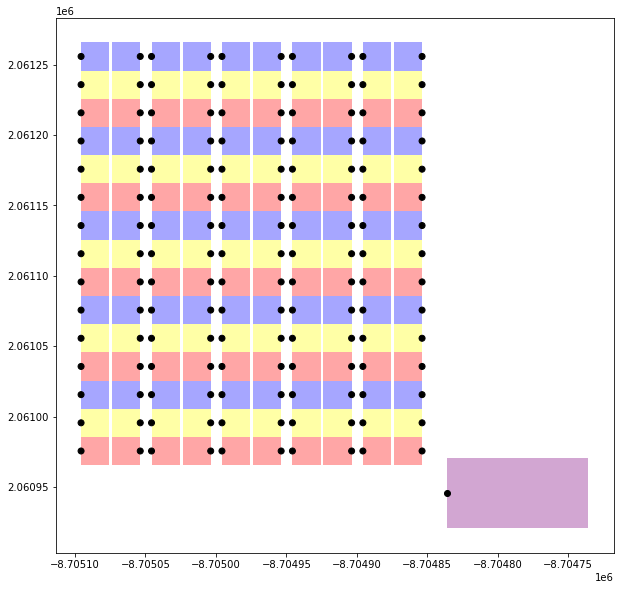

In [6]:
#repeat steps above to generate a location along the centre of the site, & shape of the school (5000m2)

a = xnew.x + (10.5*sqx + 6 * rdx)
b = xnew.y - (1*sqy)
avertices = [Point((a+100),(b-25)), Point((a+100),(b+25)), Point((a),(b+25)), Point((a),(b-25))]

sperimeter = Polygon(avertices)
school_location = Point(a,b)  

school_perimeter = {'geometry': sperimeter, 'color' : 'Purple'}
school_bus = {'geometry': school_location, 'color' : 'Black'}

school_perimeter_df = school_perimeter_df.append(school_perimeter, ignore_index=True)
school_bus_df = school_bus_df.append(school_bus, ignore_index=True)
             
fig, ax = plt.subplots(1, 1, figsize=(10, 20))

house_perimeter_df.plot(color = house_perimeter_df['color'], ax = ax, alpha=0.35)
house_bus_df.plot(color = house_bus_df['color'], ax = ax)
school_perimeter_df.plot(color = school_perimeter_df['color'], ax = ax, alpha=0.35)
school_bus_df.plot(color = school_bus_df['color'], ax = ax)

In [7]:
#gdf.to_file(r"downloads\refugee3.csv", index = False)

<AxesSubplot:>

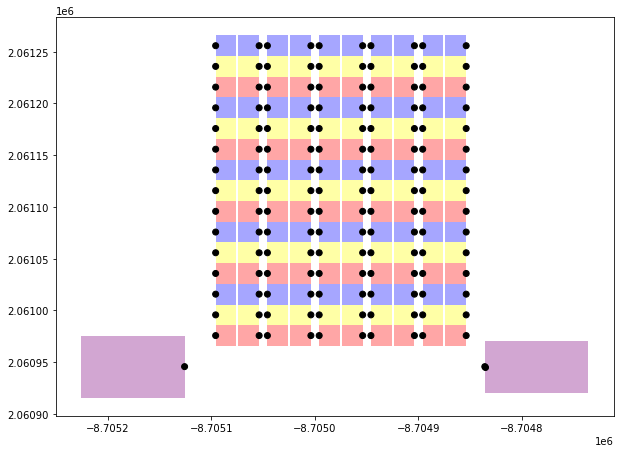

In [8]:
#repeat steps above to generate a location along the centre of the site, & shape of the solar PV farm (6000m2)
c = xnew.x - (1*sqx)
d = xnew.y - (1*sqy)
avertices = [Point((c),(d-30)), Point((c),(d+30)), Point((c-100),(d+30)), Point((c-100),(d-30))]

solar_perimeter = Polygon(avertices)
pv_location = Point(c,d)  

pv_perimeter = {'geometry': solar_perimeter, 'color' : 'Purple'}
pv_bus = {'geometry': pv_location, 'color' : 'Black'}

pv_perimeter_df = pv_perimeter_df.append(pv_perimeter, ignore_index=True)
pv_bus_df = school_bus_df.append(pv_bus, ignore_index=True)
             
fig, ax = plt.subplots(1, 1, figsize=(10, 20))

house_perimeter_df.plot(color = house_perimeter_df['color'], ax = ax, alpha=0.35)
house_bus_df.plot(color = house_bus_df['color'], ax = ax)
school_perimeter_df.plot(color = school_perimeter_df['color'], ax = ax, alpha=0.35)
school_bus_df.plot(color = school_bus_df['color'], ax = ax)
pv_perimeter_df.plot(color = pv_perimeter_df['color'], ax = ax, alpha=0.35)
pv_bus_df.plot(color = pv_bus_df['color'], ax = ax)


In [12]:
house_perimeter_df.to_file("house_plot")
house_bus_df.to_file("house_node")
school_perimeter_df.to_file("school_plot")
school_bus_df.to_file("school_node")
pv_perimeter_df.to_file("pv_plot")
pv_bus_df.to_file("pv_node")